<h1>
    Analysis of the Diabetes database from Kaggle
</h1>
<pre>
    In this notebook, exploratory data analysis has been done on the Diabetes dataset from Kaggle.
    This dataset provides a good ground for exploration of data visualization libraries.
    A logistic regression model has also been built to check whether a patient is diabetic or not.
</pre>

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#importing the dataset
diabetes = pd.read_csv('C:\\Users\\AADITYA\\Documents\\datasets\\Diabetes Analysis\\diabetes.csv')

In [3]:
diabetes.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


In [5]:
diabetes.shape

(390, 16)

In [6]:
diabetes.isna().sum()

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


<h3>
    As there are no missing values nor any arbitrary data in the dataset, there is no need to clean the data
</h3>

<h2>
    How is age distributed in the dataset?
</h2>

<AxesSubplot:xlabel='age', ylabel='Count'>

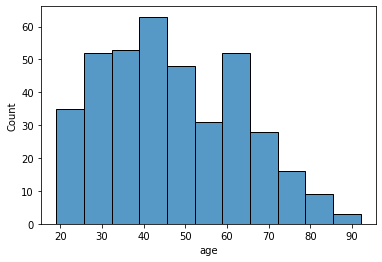

In [8]:
sns.histplot(data=diabetes, x="age")

<h3>
    We can observe that most of the patients in the sample are in their early 40s. They are closely followed by the people in their late 20s,30s and 60s.
</h3>

<h2>
    Are glucose and cholesterol levels related?
</h2>

<AxesSubplot:xlabel='glucose', ylabel='cholesterol'>

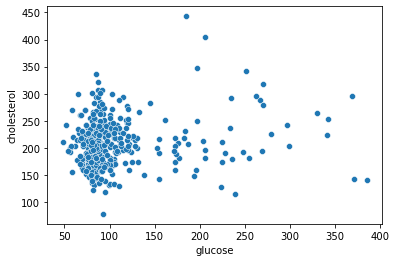

In [9]:
sns.scatterplot(data=diabetes, x="glucose", y="cholesterol")

<h3>
    There is no observed correlation between glucose and cholesterol levels
</h3>

<AxesSubplot:xlabel='weight', ylabel='Count'>

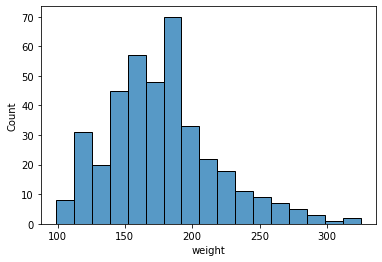

In [10]:
#distribution of weight
sns.histplot(data=diabetes, x="weight")

<h2>
    Does higher BMI indicate a higher glucose level?
</h12>

In [11]:
#is there any relation between bmi and glucose
#converting bmi column from string to float
diabetes['bmi'] = diabetes['bmi'].astype(str).str.replace(',','.')
diabetes['bmi'] = diabetes['bmi'].astype(float)
print(diabetes['bmi'])

0      22.5
1      26.4
2      29.3
3      19.6
4      20.2
       ... 
385    25.2
386    37.5
387    21.7
388    24.0
389    39.7
Name: bmi, Length: 390, dtype: float64


<AxesSubplot:xlabel='bmi', ylabel='glucose'>

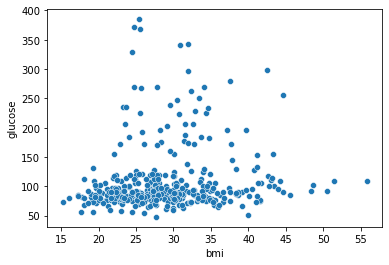

In [12]:
sns.scatterplot(data=diabetes, x="bmi", y="glucose")

<h3>
    Thus, BMI does not give a clear indication of a patient's glucose level.
</h3>    

<h2>
    Male vs female counts of patients in the sample
</h2>

<AxesSubplot:xlabel='gender', ylabel='count'>

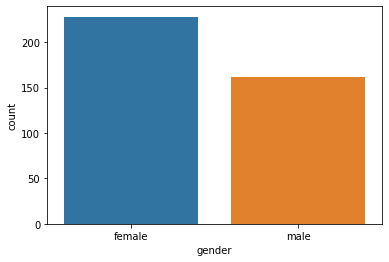

In [13]:
#distribution of genders
sns.countplot(x ='gender', data = diabetes)

<h2>
    Distribution of BMI
</h2>

<AxesSubplot:xlabel='bmi', ylabel='Count'>

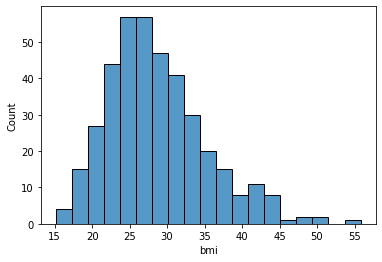

In [14]:
sns.histplot(data=diabetes, x="bmi")

<h3>
    We can observe that most of the patients have their BMIs in the range of 25-30, which is a normal BMI
</h3>

<h2>
    Does higher BMI indicate a higher cholesterol level?
</h2>

<AxesSubplot:xlabel='bmi', ylabel='cholesterol'>

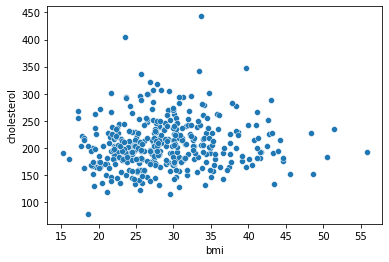

In [15]:
sns.scatterplot(data=diabetes, x="bmi", y="cholesterol")

<h3>
    Thus, a higher BMI gives no clear indication of the cholesterol levels of a patient
</h3>

<h2>
    Does a higher HDL/LDL level indicate a higher systolic/diastolic ratio?
</h2>

In [16]:
#creating a separate column for ratio between systolic and diastolic bp
diabetes['sys_dia_ratio'] = diabetes['systolic_bp'] / diabetes['diastolic_bp']

In [17]:
diabetes['sys_dia_ratio']

0      1.685714
1      1.862069
2      1.527778
3      1.906250
4      1.418605
         ...   
385    1.666667
386    1.636364
387    2.422222
388    2.073171
389    1.951220
Name: sys_dia_ratio, Length: 390, dtype: float64

<AxesSubplot:xlabel='sys_dia_ratio', ylabel='chol_hdl_ratio'>

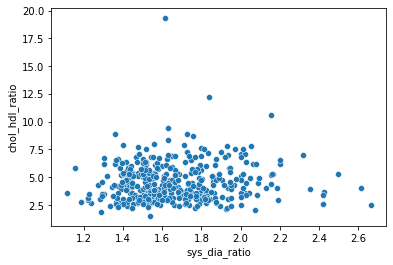

In [18]:
#converting chol_hdl_ratio column from string to float
diabetes['chol_hdl_ratio'] = diabetes['chol_hdl_ratio'].astype(str).str.replace(',','.')
diabetes['chol_hdl_ratio'] = diabetes['chol_hdl_ratio'].astype(float)
sns.scatterplot(data=diabetes, x="sys_dia_ratio", y="chol_hdl_ratio")

<h3>
    Thus there is no clear indication that there is a relation between cholesterol and blood pressure ratios.
</h3>

In [19]:
#converting the diabetes column from a string to a boolean 0/1 column
diabetes['diabetes']=diabetes['diabetes'].apply(lambda x: 0 if x == "No diabetes" else 1)

In [20]:
diabetes.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,sys_dia_ratio
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,"0,84",0,1.685714
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,"0,83",0,1.862069
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,"0,89",0,1.527778
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,"0,79",0,1.906250
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,"0,82",0,1.418605


In [21]:
diabetes['diabetes'].value_counts()

0    330
1     60
Name: diabetes, dtype: int64

<h2>
    Preparing the dependant variable 'diabetes' for building the model
</h2>

In [22]:
#converting the gender column from a string to a boolean 0/1 column
diabetes['gender']=diabetes['gender'].apply(lambda x: 0 if x == "male" else 1)

In [23]:
#converting chol_hdl_ratio column from string to float
diabetes['waist_hip_ratio'] = diabetes['waist_hip_ratio'].astype(str).str.replace(',','.')
diabetes['waist_hip_ratio'] = diabetes['waist_hip_ratio'].astype(float)

In [24]:
diabetes.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,sys_dia_ratio
0,1,193,77,49,3.9,19,1,61,119,22.5,118,70,32,38,0.84,0,1.685714
1,2,146,79,41,3.6,19,1,60,135,26.4,108,58,33,40,0.83,0,1.862069
2,3,217,75,54,4.0,20,1,67,187,29.3,110,72,40,45,0.89,0,1.527778
3,4,226,97,70,3.2,20,1,64,114,19.6,122,64,31,39,0.79,0,1.906250
4,5,164,91,67,2.4,20,1,70,141,20.2,122,86,32,39,0.82,0,1.418605


<h1>
    Building a model to predict whether a patient is diabetic or not
</h1>

In [25]:
#model 1
model = LogisticRegression(solver='lbfgs', random_state=0)
x = diabetes[['chol_hdl_ratio','age','gender','bmi','sys_dia_ratio','waist_hip_ratio']]
y = diabetes['diabetes']
model.fit(x, y)
print("The score of the model is ", model.score(x, y) * 100,"%")
print("The confusion matrix is as follows: \n")
print(confusion_matrix(y, model.predict(x)))
print("The classification report is as follows: \n")
print(classification_report(y, model.predict(x)))

The score of the model is  84.1025641025641 %
The confusion matrix is as follows: 

[[321   9]
 [ 53   7]]
The classification report is as follows: 

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       330
           1       0.44      0.12      0.18        60

    accuracy                           0.84       390
   macro avg       0.65      0.54      0.55       390
weighted avg       0.79      0.84      0.80       390



In [26]:
#model 2
model = LogisticRegression(solver='lbfgs', random_state=0)
x = diabetes[['glucose','age','gender','bmi']]
y = diabetes['diabetes']
model.fit(x, y)
print("The accuracy of the model is ", model.score(x, y) * 100, "%")
print("The confusion matrix is as follows: \n")
print(confusion_matrix(y, model.predict(x)))
print("The classification report is as follows: \n")
print(classification_report(y, model.predict(x)))

The accuracy of the model is  93.07692307692308 %
The confusion matrix is as follows: 

[[323   7]
 [ 20  40]]
The classification report is as follows: 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       330
           1       0.85      0.67      0.75        60

    accuracy                           0.93       390
   macro avg       0.90      0.82      0.85       390
weighted avg       0.93      0.93      0.93       390



In [27]:
#model 3
model = LogisticRegression(solver='lbfgs', random_state=0)
x = diabetes[['glucose','age','gender','weight']]
y = diabetes['diabetes']
model.fit(x, y)
print("The accuracy of the model is ", model.score(x, y) * 100, "%")
print("The confusion matrix is as follows: \n")
print(confusion_matrix(y, model.predict(x)))
print("The classification report is as follows: \n")
print(classification_report(y, model.predict(x)))

The accuracy of the model is  92.82051282051282 %
The confusion matrix is as follows: 

[[323   7]
 [ 21  39]]
The classification report is as follows: 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       330
           1       0.85      0.65      0.74        60

    accuracy                           0.93       390
   macro avg       0.89      0.81      0.85       390
weighted avg       0.92      0.93      0.92       390



In [28]:
#model 4
model = LogisticRegression(solver='lbfgs', random_state=0)
x = diabetes[['cholesterol','glucose','age','gender','weight']]
y = diabetes['diabetes']
model.fit(x, y)
print("The accuracy of the model is ", model.score(x, y) * 100, "%")
print("The confusion matrix is as follows: \n")
print(confusion_matrix(y, model.predict(x)))
print("The classification report is as follows: \n")
print(classification_report(y, model.predict(x)))

The accuracy of the model is  92.56410256410257 %
The confusion matrix is as follows: 

[[323   7]
 [ 22  38]]
The classification report is as follows: 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       330
           1       0.84      0.63      0.72        60

    accuracy                           0.93       390
   macro avg       0.89      0.81      0.84       390
weighted avg       0.92      0.93      0.92       390



In [31]:
#model 5
model = LogisticRegression(solver='lbfgs', random_state=0)
x = diabetes[['sys_dia_ratio','glucose','age','gender','weight']]
y = diabetes['diabetes']
model.fit(x, y)
print("The accuracy of the model is ", model.score(x, y) * 100, "%")
print("The confusion matrix is as follows: \n")
print(confusion_matrix(y, model.predict(x)))
print("The classification report is as follows: \n")
print(classification_report(y, model.predict(x)))

The accuracy of the model is  92.82051282051282 %
The confusion matrix is as follows: 

[[323   7]
 [ 21  39]]
The classification report is as follows: 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       330
           1       0.85      0.65      0.74        60

    accuracy                           0.93       390
   macro avg       0.89      0.81      0.85       390
weighted avg       0.92      0.93      0.92       390



<h3>
    Model number 2 gives an accuracy of 93%
</h3>